In [1]:
using Plots

In [2]:
Nkx = 10000 #kのx方向をNkx分割
Nky = 10000 #kのy方向をNky分割
M = 1000 #エネルギーをM分割．つまりM個の階級のヒストグラムを作る．

1000

In [3]:
#二次元の分散関係は三次元空間中の曲面として表される．ブリルアンゾーン内の各kの値で曲面の高さを2次元配列にする．

#分散関係
function Ek(kx,ky)
    return -2*(cos(kx)+cos(ky))
end

#波数をブリルアンゾーン内で分割
kxrange = range(-π,π,Nkx)
kyrange = range(-π,π,Nky)

#分散関係を表す二次元配列に値を入れていく．
E = zeros(Float64,Nkx,Nky)

for i in 1:Nkx
    for j in 1:Nky 
        E[i,j] = Ek(kxrange[i],kyrange[j])
    end
end

#println(E)

In [4]:
function count_bins(xmin,xmax,M,A)
    count = zeros(Int64,M)
    delta = (xmax-xmin)/M

    for i in 1:size(A,1)
        for j in 1:size(A,2)
            e = convert(Int64,ceil((A[i,j]-xmin)/delta))
            count[e] += 1
        end
    end

    return count
end

count_bins (generic function with 1 method)

In [5]:
#簡単な配列で関数の挙動を確認する．
A = rand(Float64,5,5)

println(A)
println("$(size(A,1)), $(size(A,2)), $(A[3,4]), $(count_bins(0,1,10,A))")

[0.428311836692416 0.5381687504718227 0.7946456694061597 0.1889539649445433 0.6177897115100695; 0.6837725787430263 0.6053613641321399 0.07977679429229234 0.8018928567716673 0.8380820936351705; 0.14745021041742323 0.6070749683384099 0.24013674610539837 0.35832164845823056 0.3474110498237287; 0.6035165180444444 0.17784842922937272 0.5172432492913419 0.340883003059527 0.7266507786785896; 0.48117926669578215 0.7578193524711073 0.40640137966917544 0.4739415949133109 0.6088308048147838]
5, 5, 0.35832164845823056, [1, 3, 1, 3, 4, 2, 6, 3, 2, 0]


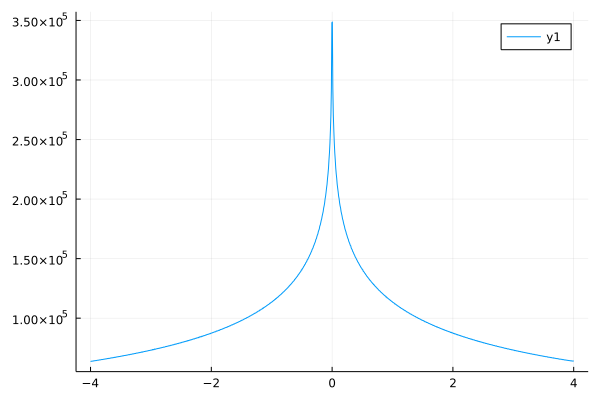

In [6]:
d = range(-4,4,M)

plot(d,count_bins(-4,4,M,E))